# Fig 11. (a), (b), (c)

/tmp/ipykernel_42326/82056539.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=melted_df[melted_df['Metric'] == 'Intra-class Distance'],
/tmp/ipykernel_42326/82056539.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=melted_df[melted_df['Metric'] == 'Inter-class Distance'],
/tmp/ipykernel_42326/82056539.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=melted_df[melted_df['Metric'] == 'Intra-to-Inter Ratio'],


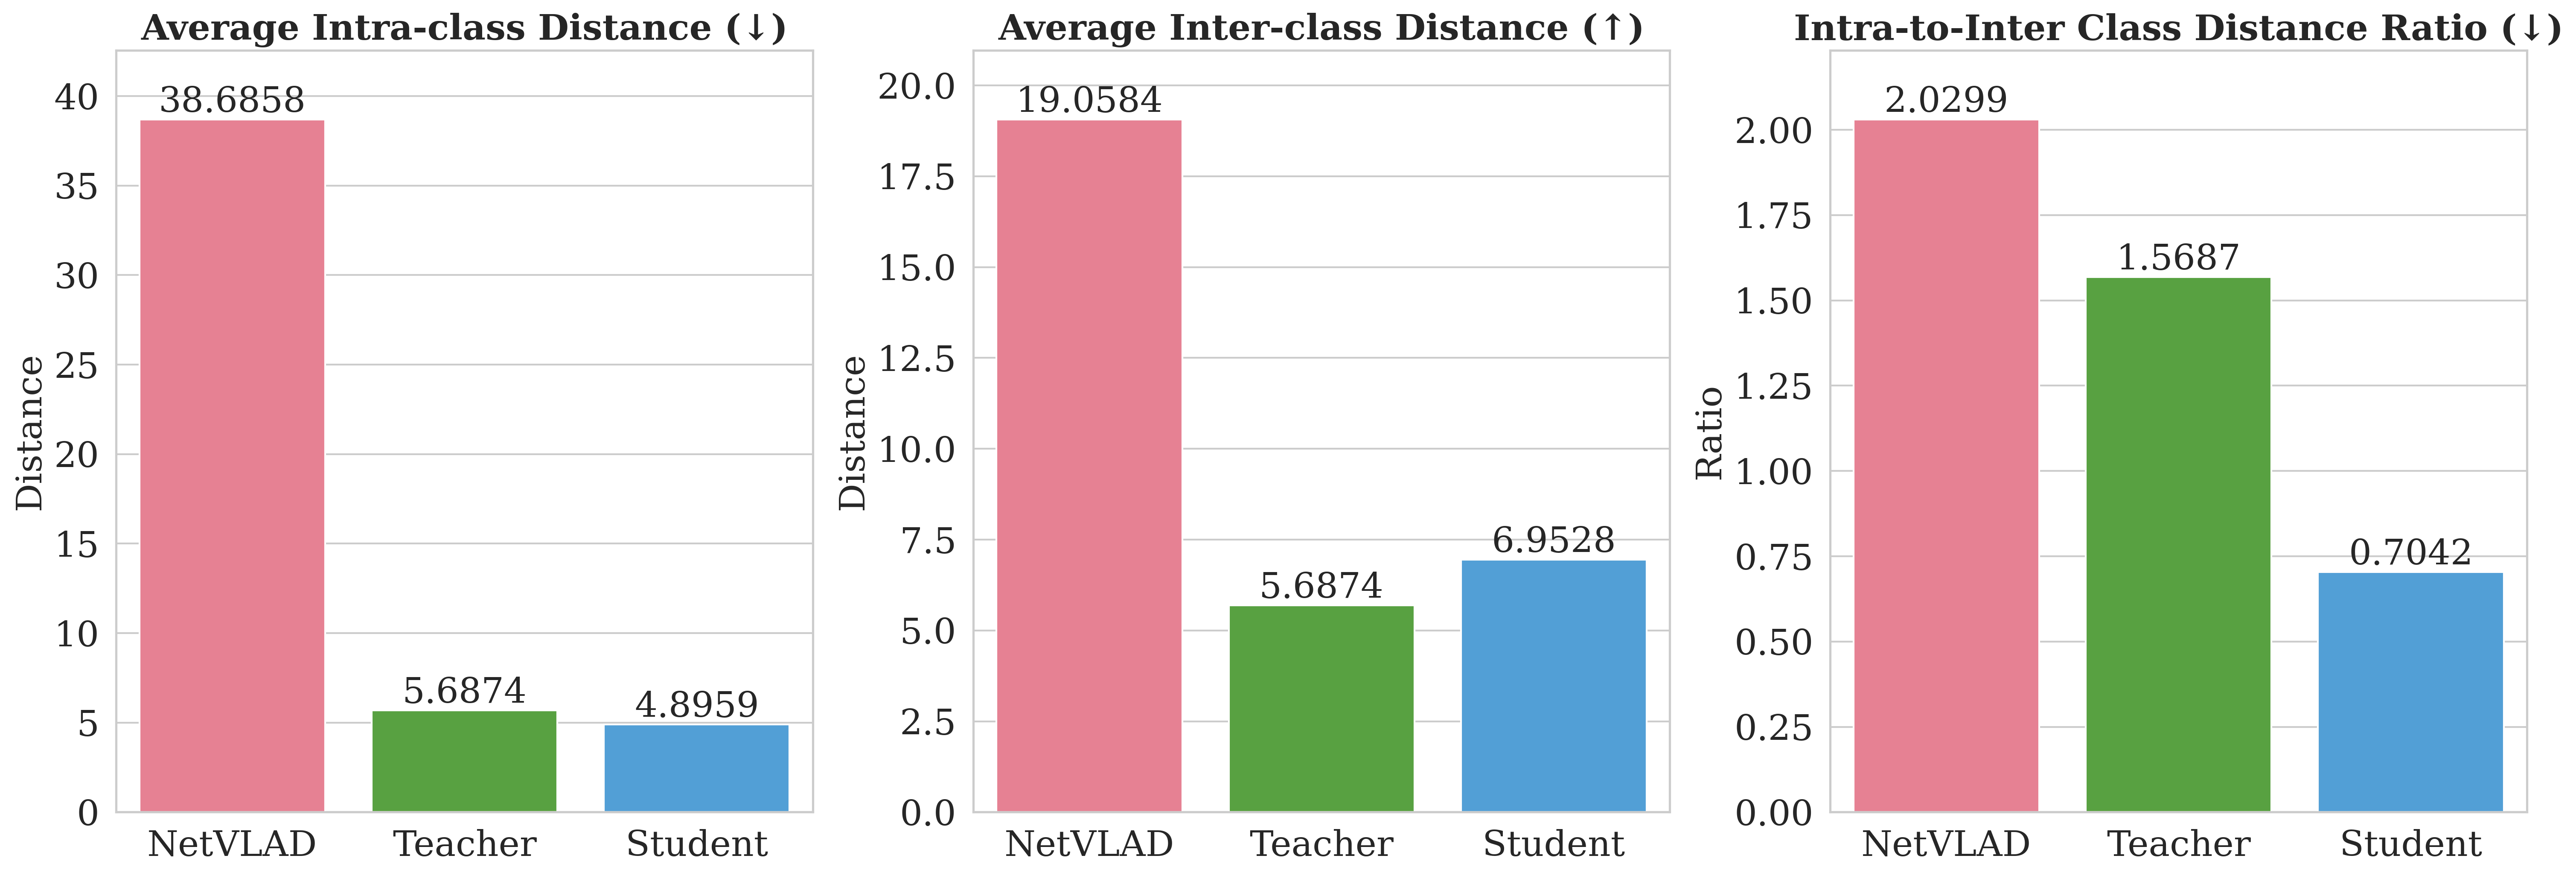

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = {
    'Model': ['NetVLAD', 'Teacher', 'Student'],
    'Intra-class Distance': [38.685805, 5.687393, 4.895899],
    'Inter-class Distance': [19.058350, 5.687393, 6.952797],
    'Intra-to-Inter Ratio': [2.029861, 1.568667, 0.704162]
}
df = pd.DataFrame(data)

# 데이터 재구성
melted_df = pd.melt(df, id_vars=['Model'], var_name='Metric', value_name='Value')

# 스타일 설정
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# 색상 팔레트 설정
color_palette = sns.color_palette("husl", n_colors=len(df))
color_dict = dict(zip(df['Model'], color_palette))

# 시각화
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7), dpi=300)

# Intra-class Distance 시각화
sns.barplot(x='Model', y='Value', data=melted_df[melted_df['Metric'] == 'Intra-class Distance'], 
            ax=ax1, palette=color_dict)
ax1.set_title('Average Intra-class Distance (↓)', fontsize=20, fontweight='bold')
ax1.set_ylabel('Distance', fontsize=20)
ax1.set_xlabel('') 
ax1.tick_params(axis='both', which='major', labelsize=20)

# Intra-class Distance y축 범위 설정 및 값 표시
intra_data = melted_df[melted_df['Metric'] == 'Intra-class Distance']
ax1.set_ylim(0, intra_data['Value'].max() * 1.1)
for i, v in enumerate(intra_data['Value']):
    ax1.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=20)


# Inter-class Distance 시각화
sns.barplot(x='Model', y='Value', data=melted_df[melted_df['Metric'] == 'Inter-class Distance'], 
            ax=ax2, palette=color_dict)
ax2.set_title('Average Inter-class Distance (↑)', fontsize=20, fontweight='bold')
ax2.set_ylabel('Distance', fontsize=20)
ax2.set_xlabel('') 
ax2.tick_params(axis='both', which='major', labelsize=20)

# Inter-class Distance y축 범위 설정 및 값 표시
inter_data = melted_df[melted_df['Metric'] == 'Inter-class Distance']
ax2.set_ylim(0, inter_data['Value'].max() * 1.1)
for i, v in enumerate(inter_data['Value']):
    ax2.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=20)


# Intra-to-Inter Ratio 시각화
sns.barplot(x='Model', y='Value', data=melted_df[melted_df['Metric'] == 'Intra-to-Inter Ratio'], 
            ax=ax3, palette=color_dict)
ax3.set_title('Intra-to-Inter Class Distance Ratio (↓)', fontsize=20, fontweight='bold')
ax3.set_ylabel('Ratio', fontsize=20)
ax3.set_xlabel('') 
ax3.tick_params(axis='both', which='major', labelsize=20)

# Ratio y축 범위 설정 및 값 표시
ratio_data = melted_df[melted_df['Metric'] == 'Intra-to-Inter Ratio']
ax3.set_ylim(0, ratio_data['Value'].max() * 1.1)
for i, v in enumerate(ratio_data['Value']):
    ax3.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=20)


plt.tight_layout()
plt.show()